In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [4]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


[9]


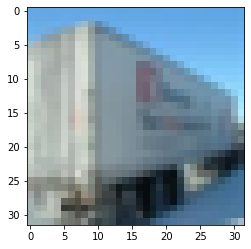

In [5]:
plt.imshow(x_train[15])
print(y_train[15])

In [7]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
from keras.layers import Conv2D, BatchNormalization, Dropout, Dense, Flatten, MaxPool2D
from keras.models import Sequential

cifar10 = Sequential()

cifar10.add(BatchNormalization())
cifar10.add(Conv2D(64,(5,5),activation = 'tanh', padding = 'same'))
cifar10.add(MaxPool2D())
cifar10.add(Dropout(0.2))

cifar10.add(BatchNormalization())
cifar10.add(Conv2D(128,(5,5),activation = 'tanh', padding = 'same'))
cifar10.add(MaxPool2D())
cifar10.add(Dropout(0.2))

cifar10.add(BatchNormalization())
cifar10.add(Conv2D(256,(5,5),activation = 'tanh', padding = 'same'))
cifar10.add(MaxPool2D())
cifar10.add(Dropout(0.2))

cifar10.add(Flatten())
cifar10.add(Dense(10,activation = 'softmax'))

In [9]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate = 0.001)

cifar10.compile(optimizer = opt,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [10]:
cifar10.fit(x_train, y_train, batch_size=100, epochs=3, validation_split = 0.1)

Epoch 1/3
450/450 [==============================] - 757s 2s/step - loss: 1.6156 - accuracy: 0.4596 - val_loss: 1.3007 - val_accuracy: 0.5554
Epoch 2/3
450/450 [==============================] - 770s 2s/step - loss: 1.2291 - accuracy: 0.5831 - val_loss: 1.1467 - val_accuracy: 0.6180
Epoch 3/3
450/450 [==============================] - 776s 2s/step - loss: 1.0755 - accuracy: 0.6330 - val_loss: 1.0251 - val_accuracy: 0.6550


In [11]:
cifar10.evaluate(x_test, y_test)

313/313 [==============================] - 43s 137ms/step - loss: 1.0713 - accuracy: 0.6361


[1.0713014602661133, 0.6360999941825867]

7
7


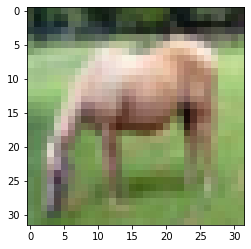

In [13]:
randind = int(random.random() * 1000)
plt.imshow(x_test[randind])
print(np.argmax(cifar10.predict(x_test[[randind]])))
print(np.argmax(y_test[randind]))